# Статистический анализ данных сервиса аренды самокатов GoFast

В рамках данного исследования проведен статистический анализ данных сервиса аренды самокатов GoFast. Пользователи используют сервис через мобильное приложение. Данным сервисом можно пользоваться с подпиской (Ultra) и без нее (Free).
- Условия использования сервиса с подпиской:
    - абонентская плата - отсутствует;
    - стоимость одной минуты  — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей.
      
</br>

- Условия использования сервиса без подписки:
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты  — 6 рублей;
    - стоимость старта — бесплатно.

**Цель** Анализ данных и проверка отдельных гипотез для формулировки предложений по развитию сервиса GoFast.

В частности, проанализировать и описать:
- частоту встречаемости городов и возраст пользователей,
- соотношение пользвоателей с подпиской и без,
- расстояние за одну поездку,
- продолжительность поездок,
- расстояние и продолжительность поездки для пользователей с подпиской и без,
- а также рассчитать помесячную выручку от каждого пользователя.

**Проверка гипотез** В рамках проверки гипотез необходимо предложить ответ на следующие вопросы:
- Тратят ли пользователи с подпиской больше времени на поездки?
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров?
- Теориетическая гипотеза: Могло бы снизиться количество обращений в техподдержку после обновления сервиса?
- Дополнительный вопрос: Определить минимальное количество промокодов , чтобы вероятность не выполнить план по возврату 100 пользователей была примерно 5%.
- Дополнительный вопрос: Оценить вероятность того, что push-уведомление сервиса откроют не более 399,5 тыс. пользователей из 1 млн, если уведомления открывают около 40 % получивших клиентов.

**Описание данных** Для исследования предоставлены три файла формата `csv` об условиях использования сервиса и о некоторых пользователях из нескольких городов, а также об их поездках за период с 01.01.2021 по 30.12.2021. В частности, предоставлена следующая информация:

- о пользователях: уникальный id, тип подписки, его имя, возраст и город;
- о поездках: даты совершения поездок, их продолжительность и протяженность;
- основные данные о типах подписки: стоимость подписки, стоимость старта поездки и цена за минуту, ежемесячный платеж. 


**Содержание исследования** 

Исследование проведено в несколько этапов.

На перевом этапе изучена общая информация о файлах. Далее проведена предобработка данных: преобразован тип данных, проведена проверка данных на пропуски, аномалии и выбросы; а также файлы объединены в один датасет.
Затем выполнен исследовательский анализ данных. Установлена частота встречаемости городов, выявлено соотношения пользователей с подпиской и без, определено среднее расстояние за одну поездку, а также средняя продолжительность поездки.
Далее более детально рассмотрены расстояния и время поездок отдельно для пользователей с подпиской и без. 
Отдельно проверены поставленные гипотезы и сформулированы ответы на вопросы.

На основе полученных результатов получено общее описание характеристик пользователей и их поездок, а также сформилурованы предолжения для развития сервиса.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общий-обзор-данных" data-toc-modified-id="Общий-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общий обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-Общий-обзор-файлов" data-toc-modified-id="Вывод-Общий-обзор-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод Общий обзор файлов</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Тип-данных.-Округление-значений.-Столбец-с-номером-месяца" data-toc-modified-id="Тип-данных.-Округление-значений.-Столбец-с-номером-месяца-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тип данных. Округление значений. Столбец с номером месяца</a></span></li><li><span><a href="#Дубликаты-и-аномалии" data-toc-modified-id="Дубликаты-и-аномалии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дубликаты и аномалии</a></span></li><li><span><a href="#Вывод-Предобработка-данных" data-toc-modified-id="Вывод-Предобработка-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод Предобработка данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Частота-встречаемости-городов" data-toc-modified-id="Частота-встречаемости-городов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Частота встречаемости городов</a></span></li><li><span><a href="#Cоотношение-пользователей-с-подпиской-и-без-подписки" data-toc-modified-id="Cоотношение-пользователей-с-подпиской-и-без-подписки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cоотношение пользователей с подпиской и без подписки</a></span></li><li><span><a href="#Возраст-пользователей" data-toc-modified-id="Возраст-пользователей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Возраст пользователей</a></span></li><li><span><a href="#Расстояние-за-одну-поездку" data-toc-modified-id="Расстояние-за-одну-поездку-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расстояние за одну поездку</a></span></li><li><span><a href="#Продолжительность-поездок" data-toc-modified-id="Продолжительность-поездок-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Продолжительность поездок</a></span></li><li><span><a href="#Вывод-Исследовательский-анализ-данных" data-toc-modified-id="Вывод-Исследовательский-анализ-данных-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод Исследовательский анализ данных</a></span></li></ul></li><li><span><a href="#Объединение-данных.-Расстояние-и-время-поездок-по-категориям" data-toc-modified-id="Объединение-данных.-Расстояние-и-время-поездок-по-категориям-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение данных. Расстояние и время поездок по категориям</a></span><ul class="toc-item"><li><span><a href="#Расстояние-и-время-поездок-для-пользователей-с-подпиской-и-без" data-toc-modified-id="Расстояние-и-время-поездок-для-пользователей-с-подпиской-и-без-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расстояние и время поездок для пользователей с подпиской и без</a></span></li></ul></li><li><span><a href="#Выручка" data-toc-modified-id="Выручка-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выручка</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?" data-toc-modified-id="Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Тратят ли пользователи с подпиской больше времени на поездки?</a></span></li><li><span><a href="#Cреднее-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-не-превышает-3130-метров?" data-toc-modified-id="Cреднее-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-не-превышает-3130-метров?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?</a></span></li><li><span><a href="#Помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки?" data-toc-modified-id="Помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?</a></span></li><li><span><a href="#Могло-бы-снизиться-количество-обращений-в-техподдержку-после-обновления-сервиса?" data-toc-modified-id="Могло-бы-снизиться-количество-обращений-в-техподдержку-после-обновления-сервиса?-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Могло бы снизиться количество обращений в техподдержку после обновления сервиса?</a></span></li><li><span><a href="#Вывод-Проверка-гипотез" data-toc-modified-id="Вывод-Проверка-гипотез-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Вывод Проверка гипотез</a></span></li></ul></li><li><span><a href="#Распределения" data-toc-modified-id="Распределения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Распределения</a></span><ul class="toc-item"><li><span><a href="#Акция-с-раздачей-промокодов" data-toc-modified-id="Акция-с-раздачей-промокодов-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Акция с раздачей промокодов</a></span></li><li><span><a href="#Push-уведомления" data-toc-modified-id="Push-уведомления-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Push-уведомления</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Общий обзор данных

Для первичного анализа данных выведем первые строки каждого датасета на экран и изучим общую информацию о них.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st 
from scipy.stats import binom, norm

import warnings
warnings.simplefilter(action='ignore')

# отобразим сетку на графиках для наглядности 
sns.set_style('whitegrid')

In [2]:

users = pd.read_csv('-------')
rides = pd.read_csv('-------', parse_dates = ['date'])
subscriptions = pd.read_csv('-------')

In [3]:
# создаем функцию для вывода общей информации о датасете

def get_general_info(df):
    print('')
    df.info()
    display(df.head())
    print('\n', '*'*50, '\n')
    print(f'Количество пропусков во всем датасете составляет {df.isna().sum().sum()}.')
    print('Таблица с пропусками в датасете:')
    display(df.isna().sum().sort_values(ascending=False).reset_index())
    print('\n','*'*50, '\n')
    print(f'Количество полностью совпадающих строк составляет {df.duplicated().sum()}.')
    print('\n','*'*50, '\n')
    print(f'Общее количество строк составляет {len(df)}.')
    print('\n','*'*50, '\n')

In [4]:
# посмотрим, за какой период предоставлены данные
print(f'\nДанные предоставлены за период с {rides["date"].min()} по {rides["date"].max()}.\n')

# отображаем общую информацию о файле с пользователями
get_general_info(users)


Данные предоставлены за период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



 ************************************************** 

Количество пропусков во всем датасете составляет 0.
Таблица с пропусками в датасете:


,index,0
0,user_id,0
1,name,0
2,age,0
3,city,0
4,subscription_type,0



 ************************************************** 

Количество полностью совпадающих строк составляет 31.

 ************************************************** 

Общее количество строк составляет 1565.

 ************************************************** 



In [5]:
# отображаем общую информацию о файле с поездками
get_general_info(rides)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



 ************************************************** 

Количество пропусков во всем датасете составляет 0.
Таблица с пропусками в датасете:


,index,0
0,user_id,0
1,distance,0
2,duration,0
3,date,0



 ************************************************** 

Количество полностью совпадающих строк составляет 0.

 ************************************************** 

Общее количество строк составляет 18068.

 ************************************************** 



In [6]:
# отображаем общую информацию о файле с подписками
get_general_info(subscriptions)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



 ************************************************** 

Количество пропусков во всем датасете составляет 0.
Таблица с пропусками в датасете:


,index,0
0,subscription_type,0
1,minute_price,0
2,start_ride_price,0
3,subscription_fee,0



 ************************************************** 

Количество полностью совпадающих строк составляет 0.

 ************************************************** 

Общее количество строк составляет 2.

 ************************************************** 



### Вывод Общий обзор файлов

Для анализа представлено три датасета с информацией о пользователях и типе подписки, их поездках и условиях использования приложения.

**Тип данных** При общем обзоре файлов тип данных во всех датасетах представляется корректным. Тип данных столбца с датой был приведен к нужному формату при чтении датасета.

**Пропуски** Явных пропусков в датасетах нет. Нужно проверить датасеты на неявные пропуски.

**Дубликаты и аномалии** В некоторых датасетах обнаружены дубликаты, которые следует удалить. Также нужно проверить значения всех столбцов на их соответствие заявленному содержанию. 

После предварительного просмотра, до предобработки данных, объединим общую информацию о датасетах:

| **Столбец** | **Тип данных** | **Пропуски** | **Описание** |
|:--------|:--------:|:--------:|:--------| 
| **Датасет `users` с данными о пользователях** |
|user_id |  int64  |  0  | уникальный идентификатор пользователя |
|name |  object  |  0  | имя пользователя |
|age |  int64  |  0  | возраст|
|city |  object  |  0  | город |
|subscription_type |  object  |  0  | тип подписки |
| **Датасет `rides` с данными о поездках**|
|user_id |  int64  |  0  | уникальный идентификатор пользователя |
|distance |  float64  |  0  | расстояние, которое проехал пользователь в текущей сессии в метрах |
|duration |  float64  |  0  | продолжительность сессии в минутах |
|date |  datetime64 (распарсили при чтении) |  0  | дата поездки |
| **Датасет `subscriptions` с данными об условиях использования приложения** |
|subscription_type |  object  |  0  | тип подписки |
|minute_price |  int64  |  0  | стоимость одной минуты поездки |
|start_ride_price |  int64  |  0  | стоимость старта поездки |
|subscription_fee |  int64  |  0  | стоимость ежемесячного платежа |

## Предобработка данных

Преобразуем тип данных при необходимости, выявим аномалии и дубликаты, обработаем их. При обнаружении заполним неявные пропуски либо поставим заглушки.

In [7]:
# создаем копии датасетов до предобработки данных
users_before = users.copy()
rides_before = rides.copy()
subscriptions_before = subscriptions.copy()

### Тип данных. Округление значений. Столбец с номером месяца

In [8]:
# округляем значения времени и расстояния поездки

rides.duration = np.ceil(rides['duration']).astype('int') 
rides.distance = np.ceil(rides['distance']).astype('int') 


# создаем столбец с номером месяца в датафрейме rides
rides['month'] = rides['date'].dt.month


# создаем и вызываем функцию для получения всех типов данных, которые встречаются в столбце каждого датафрейма

def show_types(column):
    print(f'\nУ столбца {column.name} встречаются следующие типы данных:') 
    display(column.map(type).value_counts())

for df in [users, rides, subscriptions]:
    df.apply(show_types, axis=0);


У столбца user_id встречаются следующие типы данных:


<class 'int'>    1565
Name: user_id, dtype: int64


У столбца name встречаются следующие типы данных:


<class 'str'>    1565
Name: name, dtype: int64


У столбца age встречаются следующие типы данных:


<class 'int'>    1565
Name: age, dtype: int64


У столбца city встречаются следующие типы данных:


<class 'str'>    1565
Name: city, dtype: int64


У столбца subscription_type встречаются следующие типы данных:


<class 'str'>    1565
Name: subscription_type, dtype: int64


У столбца user_id встречаются следующие типы данных:


<class 'int'>    18068
Name: user_id, dtype: int64


У столбца distance встречаются следующие типы данных:


<class 'int'>    18068
Name: distance, dtype: int64


У столбца duration встречаются следующие типы данных:


<class 'int'>    18068
Name: duration, dtype: int64


У столбца date встречаются следующие типы данных:


<class 'pandas._libs.tslibs.timestamps.Timestamp'>    18068
Name: date, dtype: int64


У столбца month встречаются следующие типы данных:


<class 'int'>    18068
Name: month, dtype: int64


У столбца subscription_type встречаются следующие типы данных:


<class 'str'>    2
Name: subscription_type, dtype: int64


У столбца minute_price встречаются следующие типы данных:


<class 'int'>    2
Name: minute_price, dtype: int64


У столбца start_ride_price встречаются следующие типы данных:


<class 'int'>    2
Name: start_ride_price, dtype: int64


У столбца subscription_fee встречаются следующие типы данных:


<class 'int'>    2
Name: subscription_fee, dtype: int64

**Вывод** Тип данных в столбцах корректный.

### Дубликаты и аномалии

При обработке и поиске неявных дубликатов и аномалий:

- удалим все пробелы и лишнюю пунктуацию в столбцах с именами и городами,
  
- найдем подозрительные строки в столбцах с именами и городами: с 2 и менее символами, состоящие только из цифр,
   
- проверим, что нет строк, с одним id но разными именами пользователей,
  
- проверим данные о возрасте пользователей на аномальные значения, создадим новый столбец с категориями возрастов пользователей,
  
- проверим данные о продолжительности и расстоянии поездок: выявим аномально короткие по продолжительности и расстоянию поездки. Сопоставим данные этих столбцов для выявления портиворечивой информации.

Кроме того, в датасете с данными о пользователях были обнаружены полностью совпадающие строки - удалим явные дубликаты после остальных проверок. 

In [9]:
# униифицируем столбцы с буквенными значениями в датафрейме users
# проверим столбцы с буквенными значениями в датафрейме users на длину и на числа

def unify_values(value):
    list_charachters = [' ', '!', '.', '"', ',']
    value_clear = value
    for charachter in list_charachters:
        value_clear = value_clear.strip(charachter).lower().title()
    return value_clear

def check_str(value):
    if len(value) <= 2:
        print(f'Найдена подозрительно короткая строка: {value}')
    elif value.isdigit() == True:
        print(f'Найдена строка, состоящая только из числа: {value}')
    

users[['name', 'city']] = users[['name', 'city']].applymap(unify_values)
users[['name', 'city']].applymap(check_str)


# удалим дубликаты в users
users = users.drop_duplicates()


# выясним, есть ли строки с одним id но разными именами пользователей

print(f'\nКоличество уникальных id с несколькими именами: '
      f'{(users.pivot_table(index="user_id", values="name", aggfunc="nunique") > 1)["name"].sum()}.')



# выясним, есть ли строки, где вместо значения указано 'Nan'

print('\nСтроки датасета users с "Nan" вместо значения:') 
display(users.loc[(users['name'].str.contains('nan', case=False) == True) | \
                  (users['city'].str.contains('nan', case=False) == True)].copy())


# посмотрим уникальные значения столбцов с именами и городами

print('\nУникальные значения столбцов с именами и городами:')
[print('\n', users[column].name, '\n', sorted(users[column].unique())) for column in users[['name','city']]];

Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян
Найдена подозрительно короткая строка: Ян

Количество уникальных id с несколькими именами: 0.

Строки датасета users с "Nan" вместо значения:


,user_id,name,age,city,subscription_type



Уникальные значения столбцов с именами и городами:

 name 
 ['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра', 'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина', 'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий', 'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина', 'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём', 'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия', 'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника', 'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад', 'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод', 'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей', 'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила', 'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий', 'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена', 'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар', 'Злата', 'Иван', 'Игнат', 'Игорь', 'Ильдар', 'Илья',

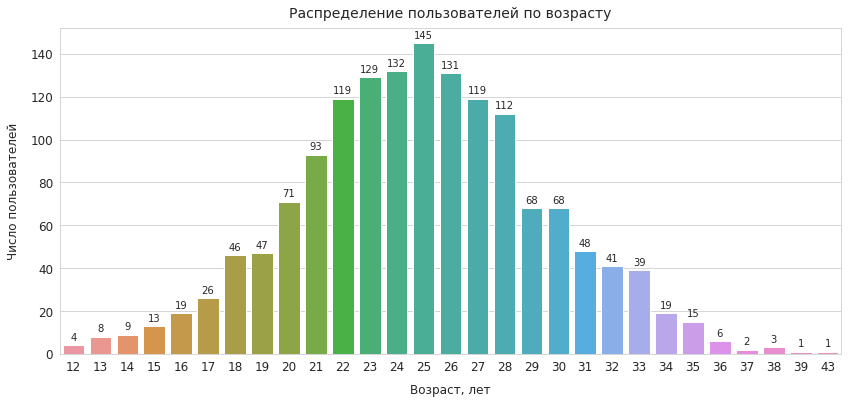

,index,Возрастная категория
0,22-27 лет,775
1,28-31 лет,296
2,18-21 лет,257
3,32-43 лет,127
4,До 18 лет,79


In [10]:
# посмотрим на возрастные аномалии

fig, ax = plt.subplots(figsize=(14,6))
ax = sns.barplot(data = users.groupby('age').agg({'user_id':'count'}).reset_index(), x='age', y='user_id') 

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),textcoords='offset points')

ax.set_title('Распределение пользователей по возрасту', fontsize=14, pad=10)
ax.set_xlabel('Возраст, лет', fontsize=12, labelpad=10)
ax.set_ylabel('Число пользователей', fontsize=12, labelpad=10)
ax.tick_params(labelsize=12)
plt.show()


# создаем новый столбец с категориями возрастов пользователей для дальнейшего удобства исследования
def create_column_age_type(age):
    if 12 <= age < 18:
        type = "До 18 лет"
    elif 18 <= age <= 21:
         type = "18-21 лет"
    elif 22 <= age <= 27:
         type = "22-27 лет"
    elif 28 <= age <= 31:
         type = "28-31 лет"
    else: 
         type = "32-43 лет"
    return type

users['age_type'] = users['age'].apply(create_column_age_type)
display(users.age_type.value_counts().reset_index()\
        .rename(columns={'age_type': 'Возрастная категория', 'count':'Число пользователей' }));

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64


Число аномально быстрых поездок: 95

Число аномально долгих поездок: 3


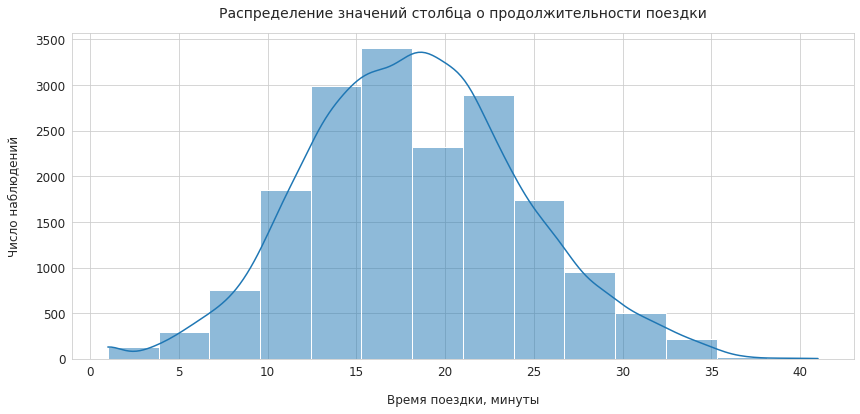

In [11]:
# посмотрим на распределение значений столбца с продолжительностью поездки

fig, ax = plt.subplots(figsize=(14,6))

bins = round(math.log2(len(rides) + 1))
sns.histplot(rides['duration'], kde=True, bins=bins)

ax.set_title('Распределение значений столбца о продолжительности поездки', fontsize=14, pad=15)
ax.set_xlabel('Время поездки, минуты', fontsize=12, labelpad=15)
ax.set_ylabel('Число наблюдений', fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, width=5)

display(rides['duration'].describe())

print(f'\nЧисло аномально быстрых поездок: {(rides["duration"] <= 2).sum()}')
print(f'\nЧисло аномально долгих поездок: {(rides["duration"] >= 40).sum()}');

count    18068.000000
mean      3071.159841
std       1116.831548
min          1.000000
25%       2543.750000
50%       3134.000000
75%       3777.000000
max       7212.000000
Name: distance, dtype: float64


Число аномально коротких поездок: 3

Число аномально длинных поездок: 10

Аномальных поездок: 95

Аномальных коротких по времени и расстоянию поездок: 95, это 0.5% от всех данных о поездках.


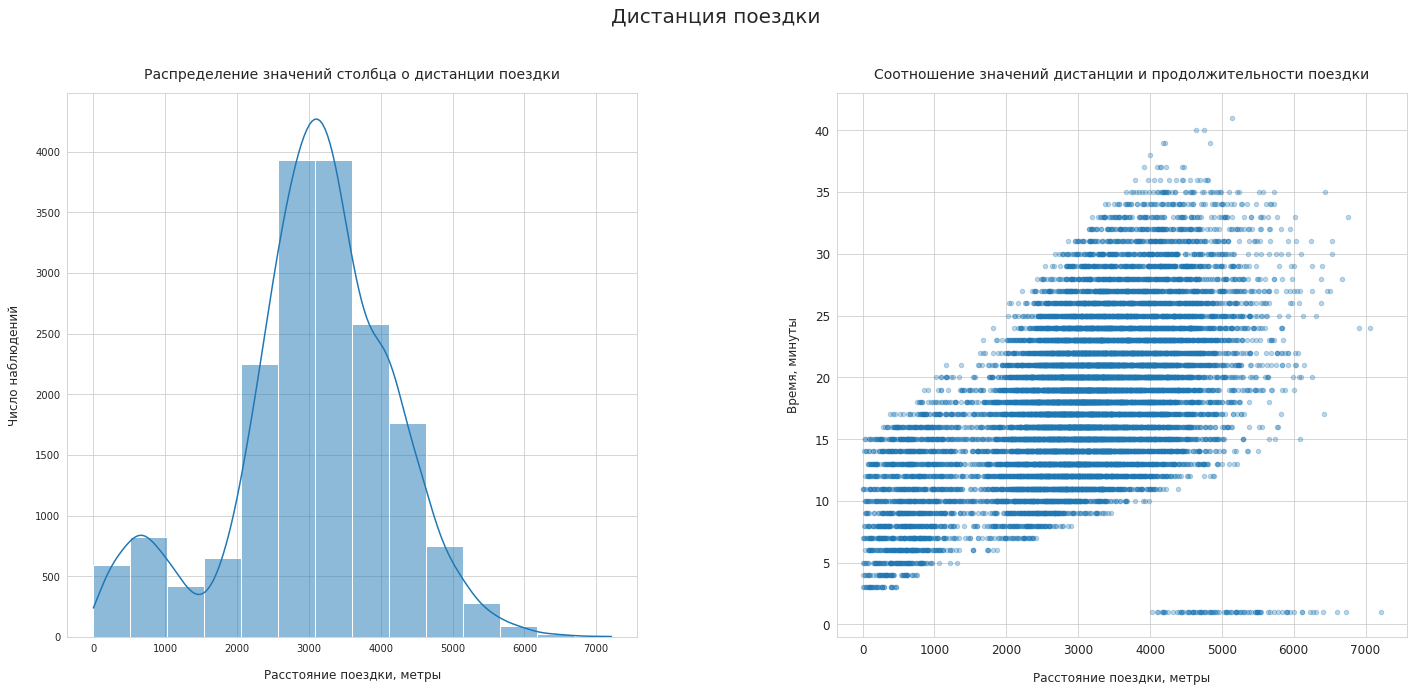

In [12]:
# посмотрим на распределение значений столбца с дистанцией поездки

fig, axes = plt.subplots(1, 2, figsize=(24,10))
fig.suptitle('Дистанция поездки', fontsize=20, y=1)
plt.subplots_adjust(wspace = 0.35, 
                     hspace = 0.4)

bins = round(math.log2(len(rides) + 1))
sns.histplot(rides['distance'], ax=axes[0], kde=True, bins=bins)

axes[0].set_title('Распределение значений столбца о дистанции поездки', fontsize=14, pad=15)
axes[0].set_xlabel('Расстояние поездки, метры', fontsize=12, labelpad=15)
axes[0].set_ylabel('Число наблюдений', fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, width=5)

rides.plot.scatter(ax=axes[1], x='distance', y='duration', alpha=0.3);
axes[1].set_title('Соотношение значений дистанции и продолжительности поездки', fontsize=14, pad=15)
axes[1].set_xlabel('Расстояние поездки, метры', fontsize=12, labelpad=15)
axes[1].set_ylabel('Время, минуты', fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, width=5)

display(rides['distance'].describe())

print(f'\nЧисло аномально коротких поездок: {(rides["distance"] <= 5).sum()}')
print(f'\nЧисло аномально длинных поездок: {(rides["distance"] >= 6500).sum()}')

# смотрим сколько аномально коротких по времени, но длинных поездок
print(f'\nАномальных поездок: {len(rides.query("duration <=2 and distance>= 4000"))}')

#считаем, какой процент от всех поездок составляют аномальные
print(f'\nАномальных коротких по времени и расстоянию поездок: {len(rides.query("duration <=2 and distance>= 4000"))}, '
      f'это {round((len(rides.query("duration <=2 and distance>= 4000")) / len(rides) * 100),1)}% от всех данных о поездках.')

#удаляем аномальные поездки
rides.drop(rides.query('duration <=2 and distance >= 4000').index, inplace=True);

Как видим, в данных присутствуют 95 аномальных поездок: поездки совершенные за менее чем 3 минуты, но с расстоянием более чем 4 км.

В процентом отношении к общему числу данных такие поездки составляют около 0.5% (т.е. менее 1% всех поездок). 

Представляется, что такие данные нереалистичны и не подлежат учету при проведении исследования. Полагаю, что информацию о данных поездках следует удалить. Нам неизвестно, где и по каким показателям при сборе данных была совершена ошибка в связи с чем мы не можем заполнить искаженные данные расчетами средних показателей. 

В случае же сохранения таких аномалий далее в исследовании, в частности, мы можем допустить следующие искажения:
- при подсчете среднего расстояния в целом, а также по категориям подписок, мы учтем такие аномальные поездки, которые по имеющимся данным были очень длинными. Это может исказить информацию о средней длине поездки;
- при подсчете выручки мы будем исходить из показателей времени поездки, т.е. мы рассчитаем маленькую выручку от поездки при, возможно, фактическом достаточно длинном расстоянии.

Одновременно с этим, полагаю, что удаление менее чем 1% данных значительно не повлияет на результаты исследования, но исключит искажение в подсчетах данных.  

**Вывод** 
В рамках обработки аномалий и дубликатов была проведена следующая работа:
- столбцы с типом данных `str` датасета 'users' приведены к унифицированному виду и проверены на наличие неявных дубликатов, подозрительно коротких строк,
- проверены значения столбца 'age' датасета 'users'. Выявлено, что сервис используют несовершеннолетние. Добавлен новый столбец с категориями возраста для удобства дальнейшего анализа,
- удалены дубликаты датасета 'users',
- выявлены и удалены аномально быстрые но длинные поездки датасета 'rides',
- оставлены одновременно короткие и по времени и расстоянию поездки датасета 'rides': такие поездки представляются реалистичными (например, пользователь взял самокат в аренду, но передумал) и их достаточно мало.

### Вывод Предобработка данных

In [13]:
# считаем количество строк в каждом датасете до и после преобразования
for df_before, df_after in zip([users_before, rides_before, subscriptions_before], [users, rides, subscriptions]):
    print(df_after.head())
    print('\n', '*'*50)
    print(f'Количество строк до предобработки данных составляет:', len(df_before))
    print(f'Количество строк после предобработки данных составляет: {len(df_after)}', 
          f'это {round(len(df_after)/len(df_before)*100)}% от первоначального объема.')
    print('*'*50, '\n')

# объединим данные в один датасет
data = pd.merge(pd.merge(users, rides, on='user_id', how='left'), subscriptions, 
                on='subscription_type', how='left').drop_duplicates()

# вызов функции для вывода общей информации об объединенном датасете
print('\nОбъединенный датасет')
get_general_info(data)

   user_id        name  age            city subscription_type   age_type
0        1        Кира   22          Тюмень             ultra  22-27 лет
1        2   Станислав   31            Омск             ultra  28-31 лет
2        3     Алексей   20          Москва             ultra  18-21 лет
3        4  Константин   26  Ростов-На-Дону             ultra  22-27 лет
4        5       Адель   28            Омск             ultra  28-31 лет

 **************************************************
Количество строк до предобработки данных составляет: 1565
Количество строк после предобработки данных составляет: 1534 это 98% от первоначального объема.
************************************************** 

   user_id  distance  duration       date  month
0        1      4410        26 2021-01-01      1
1        1      2618        16 2021-01-18      1
2        1       755         7 2021-04-20      4
3        1      2695        19 2021-08-11      8
4        1      4029        27 2021-08-28      8

 ******

,user_id,name,age,city,subscription_type,age_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,22-27 лет,4410,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,22-27 лет,2618,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,22-27 лет,755,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,22-27 лет,2695,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,22-27 лет,4029,27,2021-08-28,8,6,0,199



 ************************************************** 

Количество пропусков во всем датасете составляет 0.
Таблица с пропусками в датасете:


,index,0
0,user_id,0
1,name,0
2,age,0
3,city,0
4,subscription_type,0
5,age_type,0
6,distance,0
7,duration,0
8,date,0
9,month,0



 ************************************************** 

Количество полностью совпадающих строк составляет 0.

 ************************************************** 

Общее количество строк составляет 17973.

 ************************************************** 



По результатам предобработки данных:

**Объем датасетов** Количество строк датасета 'users' уменьшилось на 2% и датасета 'rides' на 1%. Количество строк датасета 'subscriptions' не изменилось.


**Новые столбцы** В датасет 'rides' добавлен новый столбец 'month' с месяцем совершения поездки. В датасет 'users' добавлен новый столбец  'age_type' с категориями возрастов пользователей. 


**Тип данных** Тип данных во всех столбцах всех датасетов корректный.  Тип данных столбца 'date' датасета 'rides' был приведен к формату datetime при чтении файла (в разделе общий обзор данных). В датасете 'rides' значения столбцов 'distance' и  'duration' округлены к большему значению.


**Дубликаты и аномалии** В столбцах датасета 'users' была удалена лишняя пунктуация, унифицировано написание значений (заглавная буква), проверено содержание строк на аномальные значения. Проверены аномалии столбца 'age'  датасета 'users'. Также были выявлены аномалии в датасете 'rides' по столбцам 'duration' и 'distance' - аномально короткие по времени и длинные поездки. Такие строки были удалены. Одновременно короткие и по времени и расстоянию поездки были оставлены, так как такие данные представляются реалистичными (пользователь взял самокат, но передумал), также как аномально долгие и длинные поездки (данные не выбиваются из нормального распределения). 


**Пропуски** В датасетах нет явных пропусков. Неявные пропуски не были выявлены.


**Объединение датасетов** После предобработки данных датасеты объеденины в один для возможности использования агрегированных данных для дальшнейшего исследования.

## Исследовательский анализ данных 

Опишем имеющиеся данные, а также визуализируем их:

- Определим частоту встречаемости городов,

- Посмотрим соотношение пользователей с подпиской и без,

- Рассмотрим возраст пользователей,

- Изучим расстояние, которое преодолевает пользователь за одну поездку,

- Проанализируем продолжительность поездок.

### Частота встречаемости городов

In [14]:
# пдоготовим палитру цветов для городов

colors_category = {'Пятигорск': 'lightskyblue', 'Екатеринбург': 'plum', 'Ростов-На-Дону': 'peachpuff', 
                   'Краснодар':'palevioletred', 'Сочи': 'palegoldenrod', 'Омск': 'pink', 
                   'Тюмень': 'darkkhaki', 'Москва': 'darkgrey'}

# 2) создадим функции для определения цвета элементов на графике, используя созданный словарь

def choose_color(list_name):
    list_color = []
    for name in list_name:
        for key in colors_category.keys():
            if name == key:
                list_color.append(colors_category[name])
    return list_color


# сгруппируем данные: 1) города по количеству уникальных пользвателей 2) частота городов с точки зрения частоты поездок

city_by_users = users.groupby('city').agg({'user_id':'count'}).sort_values(by='user_id', ascending=False).reset_index()
city_by_rides = data.city.value_counts().reset_index();

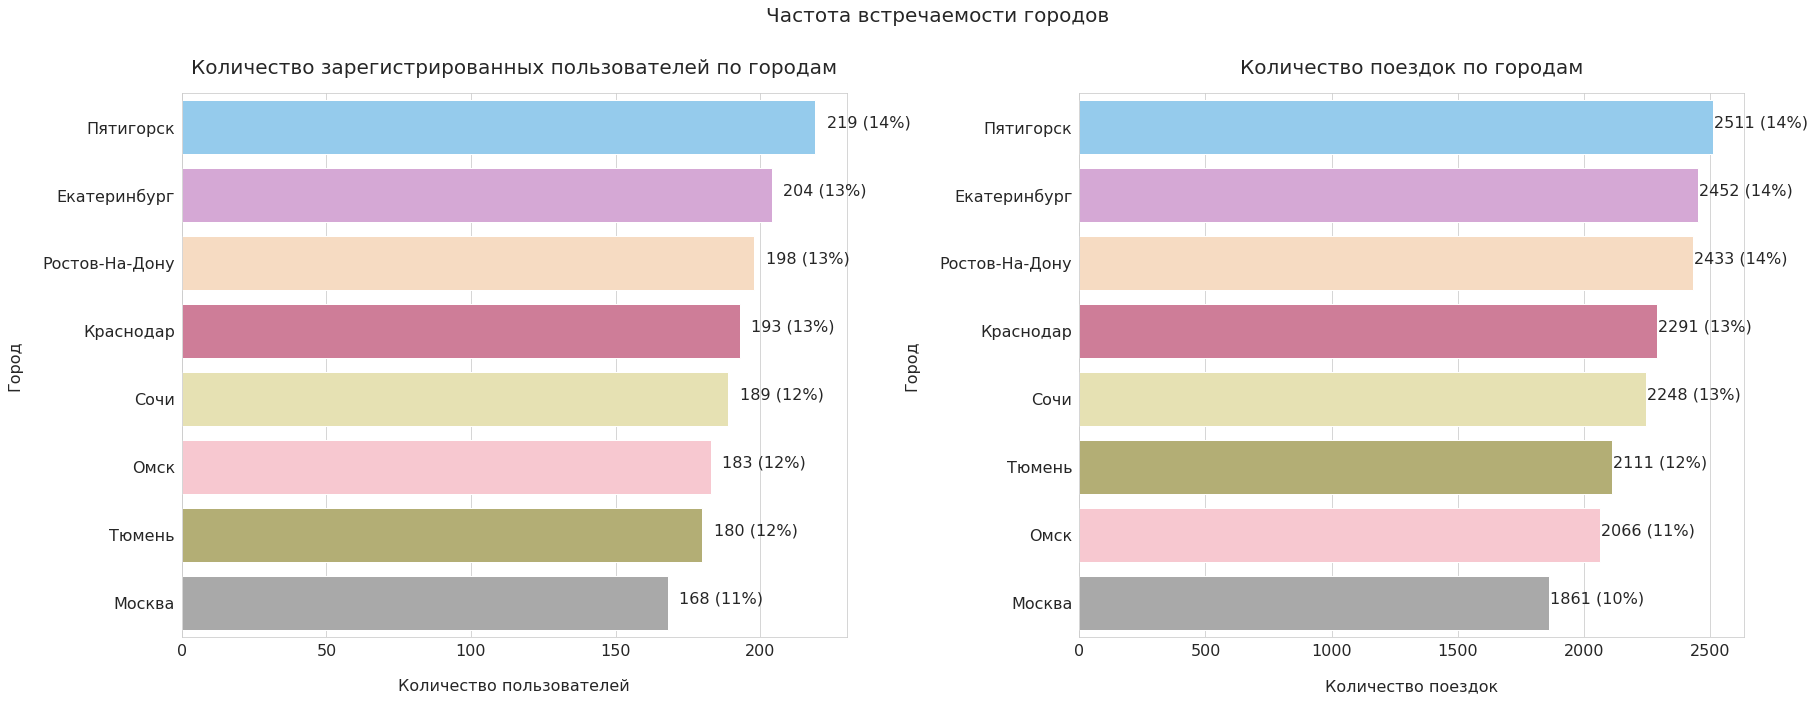

In [15]:
# построим графики, на которых отразим 1) количество зарегистрированных пользователей по городам
# 2) частоту поездок по городам

fig, axes = plt.subplots(1, 2, figsize=(28,10))
fig.suptitle('Частота встречаемости городов', fontsize=20, y=1)
plt.subplots_adjust(wspace = 0.35, 
                     hspace = 0.4)

sns.barplot(ax=axes[0], data = city_by_users, x='user_id', y='city',
            palette=choose_color(city_by_users['city']))


def autopct_format_city(value):
    total = city_by_users['user_id'].sum()
    return '{} ({}%)'.format(value, round(value / total * 100))
    
for p in axes[0].patches:
    axes[0].annotate(autopct_format_city(int(p.get_width())), (p.get_x() + 4 \
                                                                        + p.get_width(), p.get_y() + 0.4), size=16)
axes[0].set_title('Количество зарегистрированных пользователей по городам', fontsize=20, pad=20)
axes[0].set_xlabel('Количество пользователей', fontsize=16, labelpad=20)
axes[0].set_ylabel('Город', fontsize=16, labelpad=20)
axes[0].tick_params(labelsize=16)



sns.barplot(ax=axes[1], data = city_by_rides, x='city', y='index', 
            palette=choose_color(city_by_rides['index']))


def autopct_format_city(value):
    total = city_by_rides['city'].sum()
    return '{} ({}%)'.format(value, round(value / total * 100))
    
for p in axes[1].patches:
    axes[1].annotate(autopct_format_city(int(p.get_width())), (p.get_x() + 4 \
                                                                        + p.get_width(), p.get_y() + 0.4), size=16)
axes[1].set_title('Количество поездок по городам', fontsize=20, pad=20)
axes[1].set_xlabel('Количество поездок', fontsize=16, labelpad=20)
axes[1].set_ylabel('Город', fontsize=16, labelpad=20)
axes[1].tick_params(labelsize=16);

**Вывод**

В целом частота встречаемости городов и количество поездок соответствуют друг другу.

**Больше всего пользователей зарегистрировано в Пятигорске (14%)** и именно в этом городе совершается больше всего поездок (также 14%).

Немного меньше пользователей зарегистрировано в Екатеринбурге, Ростове и Краснодаре (по 13%), но по числу поездок они практически не уступают Пятигорску.

**Меньше всего пользователей зарегистрировано в Москве (11%)**. Этот город и по частоте встречаемости на последнем месте (11%). Такие низкие показатели для такого мегаполиса как Москва требуют отдельного анализа - возможно, пользователям из Москвы не доступен какой-то необходимый для жителей этого города функционал либо в этом городе недостаточно рекламы сервиса.

### Cоотношение пользователей с подпиской и без подписки

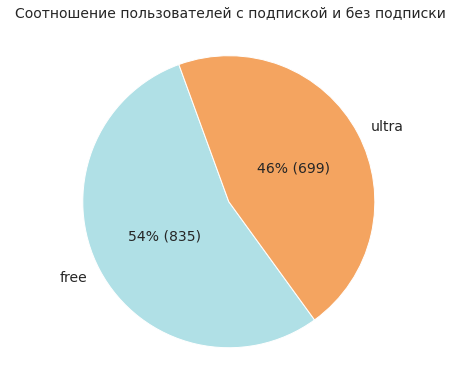

In [16]:
# подсчитываем количество сетевых и несетевых заведений
subscription_type = users['subscription_type'].value_counts().reset_index()

# создаем функцию для вывода внутри долей диаграммы процентов и числа пользователей
def autopct_format_subscription (percent):
    total = subscription_type['subscription_type'].sum()
    return '{:.0f}% ({:.0f})'.format(percent, total * percent / 100)

# строим круговую диаграмму
fig, ax = plt.subplots(figsize =(8,6))

wedges, labels, autopct = plt.pie(
    x=subscription_type['subscription_type'], labels=subscription_type['index'], 
    autopct=autopct_format_subscription,
    colors=["powderblue", "sandybrown"], textprops={'fontsize':14},
    startangle=110, pctdistance=0.5)
 
for lab in labels:
    lab.set_fontsize(14)

plt.axis('equal') 
ax.set_title(label="Соотношение пользователей с подпиской и без подписки", fontsize=14, pad=20);

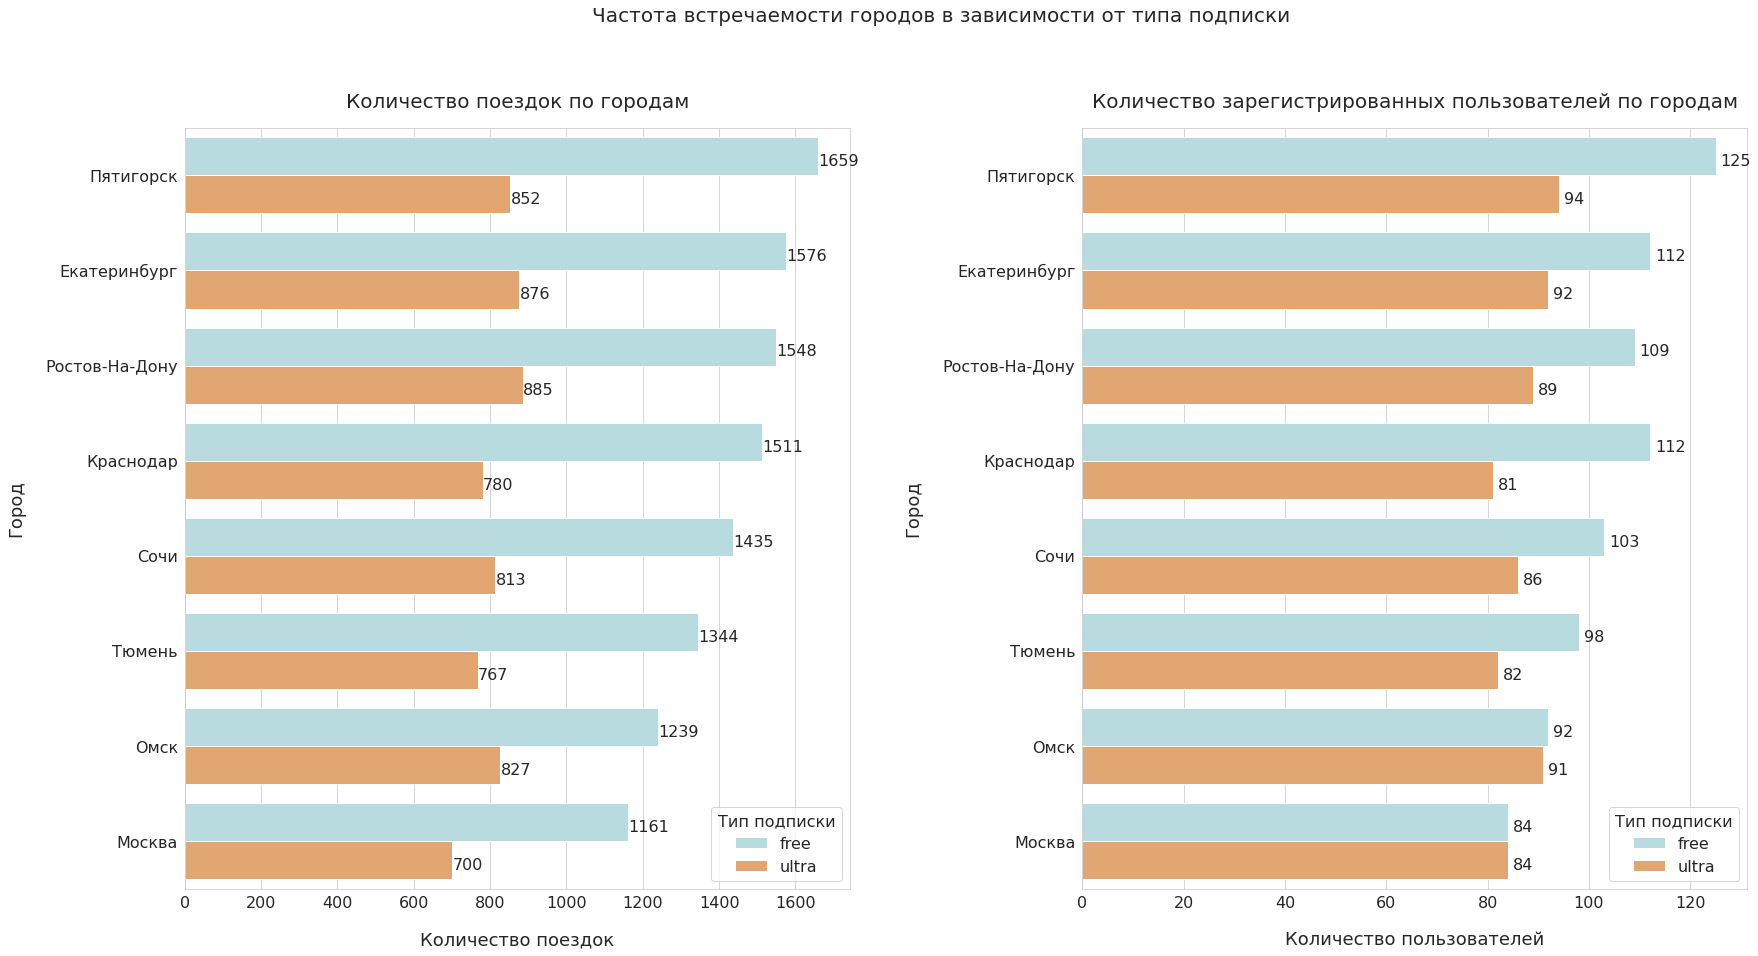

In [17]:
# посмотрим как пользователи в зависимости от подписки распределились по городам и по числу поездок

pivot_city = data.pivot_table(index=['subscription_type', 'city'], values='user_id', 
                              aggfunc=['count', 'nunique'], fill_value=0).reset_index()
pivot_city.columns = ['Тип подписки', 'Город', 'Частота встречаемости городов', 'Число пользователей']
pivot_city.sort_values(by='Частота встречаемости городов', ascending=False, inplace=True)


fig, axes = plt.subplots(1, 2, figsize=(28,14))
fig.suptitle('Частота встречаемости городов в зависимости от типа подписки', fontsize=20, y=1)
plt.subplots_adjust(wspace = 0.35, 
                     hspace = 0.4)

sns.barplot(ax=axes[0], data=pivot_city, x='Частота встречаемости городов', 
            y='Город', hue='Тип подписки', palette={"free":"powderblue", "ultra":"sandybrown"})

for p in axes[0].patches:
   axes[0].annotate((int(p.get_width())), (p.get_x() + 1 + p.get_width(), p.get_y() + 0.3), size=16)

axes[0].set_title('Количество поездок по городам', fontsize=20, pad=20)
axes[0].set_xlabel('Количество поездок', fontsize=18, labelpad=20)
axes[0].set_ylabel('Город', fontsize=18, labelpad=20)
axes[0].tick_params(labelsize=16)
axes[0].legend(title='Тип подписки', fontsize=16)                                                           
plt.setp(axes[0].get_legend().get_title(), fontsize='16')


sns.barplot(ax=axes[1], data=pivot_city, x='Число пользователей', 
            y='Город', hue='Тип подписки', 
            palette={"free":"powderblue", "ultra":"sandybrown"})

for p in axes[1].patches:
   axes[1].annotate((int(p.get_width())), (p.get_x() + 1 + p.get_width(), p.get_y() + 0.3), size=16)

axes[1].set_title('Количество зарегистрированных пользователей по городам', fontsize=20, pad=20)
axes[1].set_xlabel('Количество пользователей', fontsize=18, labelpad=20)
axes[1].set_ylabel('Город', fontsize=18, labelpad=20)
axes[1].tick_params(labelsize=16)
axes[1].legend(title='Тип подписки', fontsize=16)                                                           
plt.setp(axes[1].get_legend().get_title(), fontsize='16');

**Вывод**

**Пользователей без подписки немного больше (54%), чем пользователей с подпиской(46%).**
Больше всего пользователей как с подпиской, так и без нее в Пятигорске.


В целом по всем городам чаще совершают поездки пользователи без подписки. Вновь обращает на себя внимание Москва, где пользователей с подпиской и без одинаковое количество, при этом пользователи без подписки совершают в 1,5 раза больше поездок.

### Возраст пользователей

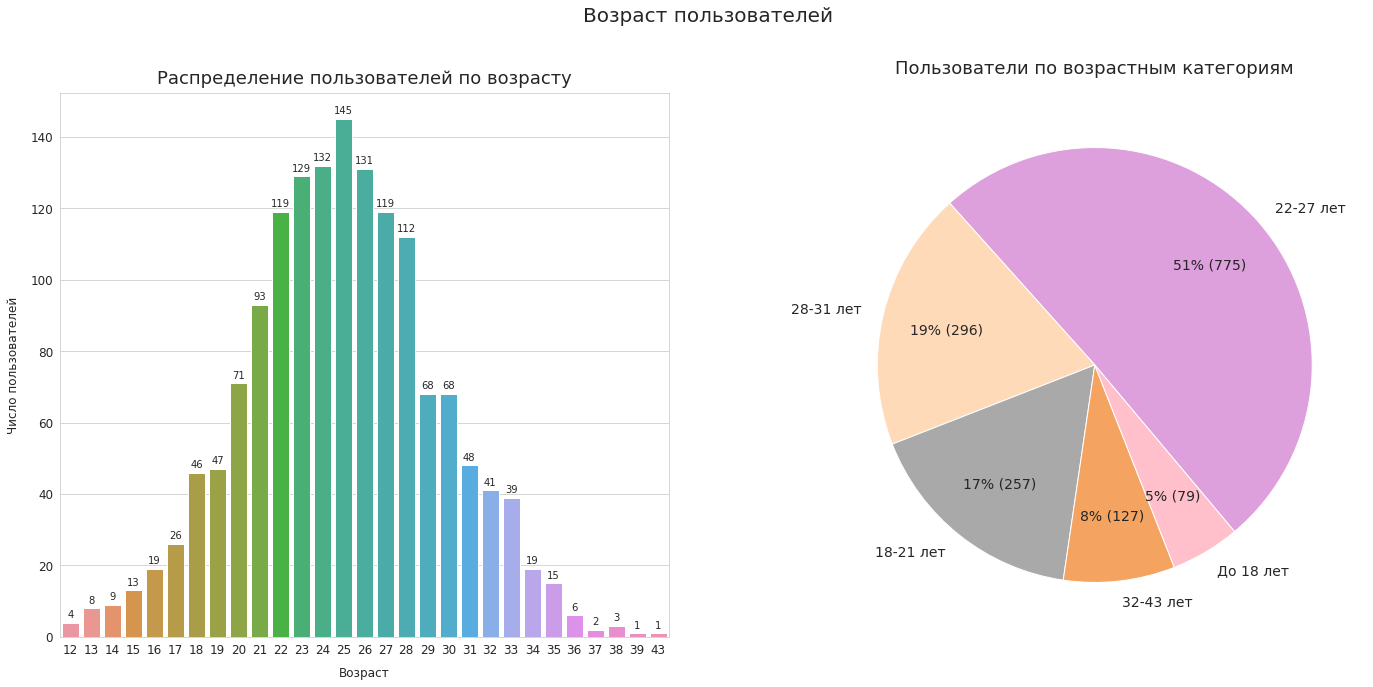

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [18]:
# посмотрим на возрастные характеристики пользователей
age_by_age_type = users['age_type'].value_counts().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(24,10))
fig.suptitle('Возраст пользователей', fontsize=20, y=1)
plt.subplots_adjust(wspace = 0.2, 
                     hspace = 0.4)

sns.barplot(ax=axes[0], data = users.groupby('age').agg({'user_id':'count'}).reset_index(), 
            x='age', y='user_id') 

for bar in axes[0].patches:
    axes[0].annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),textcoords='offset points')

axes[0].set_title('Распределение пользователей по возрасту', fontsize=18, pad=10)
axes[0].set_xlabel('Возраст', fontsize=12, labelpad=10)
axes[0].set_ylabel('Число пользователей', fontsize=12, labelpad=10)
axes[0].tick_params(labelsize=12)



def autopct_format_age (percent):
    total = age_by_age_type['age_type'].sum()
    return '{:.0f}% ({:.0f})'.format(percent, total * percent / 100)

plt.pie(x=age_by_age_type['age_type'], labels=age_by_age_type['index'], 
             autopct=autopct_format_age, colors=['plum','peachpuff','darkgrey', "sandybrown", "pink", "yellow" ], 
             textprops={'fontsize':14}, startangle=310, pctdistance=0.7)
 
for lab in labels:
    lab.set_fontsize(14)

axes[1].set_title(label="Пользователи по возрастным категориям", fontsize=18, pad=20)
plt.show()

display(users['age'].describe());

**Вывод**

Пользователи сервиса представлены лицами в возрасте от 12 до 43 лет. **Средний возраст пользователей - 25 лет**.
Большая часть пользователей в возрасте 22-27 лет (51%). Несовершеннолетних пользователей около 5% от всех. При этом пользователей старше 32 лет только 8%. 

### Расстояние за одну поездку

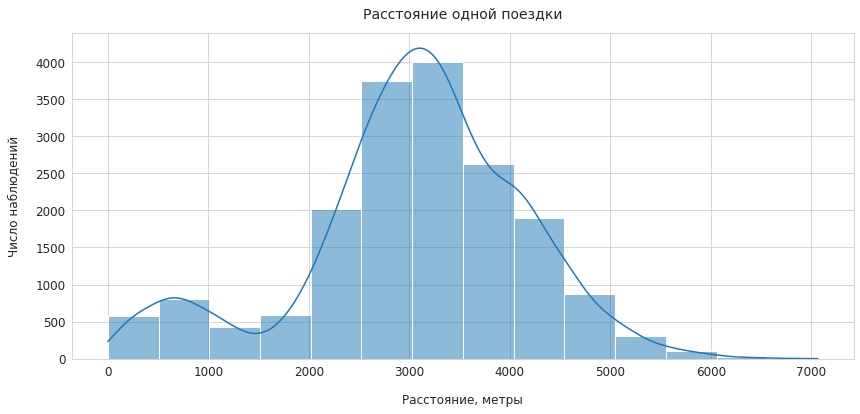

count    17973.000000
mean      3060.363545
std       1108.814584
min          1.000000
25%       2539.000000
50%       3130.000000
75%       3763.000000
max       7067.000000
Name: distance, dtype: float64

In [19]:
# посмотрим на расстояние поездок
bins = round(math.log2(len(rides) + 1))

fig, ax = plt.subplots(figsize=(14,6))
ax = sns.histplot(rides['distance'],bins=bins,kde=True)
ax.set_title('Расстояние одной поездки', fontsize=14, pad=15)
ax.set_xlabel('Расстояние, метры', fontsize=12, labelpad=15)
ax.set_ylabel('Число наблюдений', fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, width=5)
plt.show()

display(rides['distance'].describe());

**Вывод**

Пользователи совершают поездки разной длины.
В целом, график проказывает нормальное распределение значений. 

**Наиболее часто пользователи совершают поездки на 3000-3150 метров, медианная продолжительность поездки составляет 3130 метров.**


Однако количество поездок, меньше либо больше этой отметки, также довольно велико. 
Среди коротких поездок (до 3000 метров) мы видим, что популярны поездки около 500-1000 метров. 
Также видим, что некоторые пользователи совершают аномально короткие поездки длиной около 500 метров и даже меньше. Самая короткая поездка была всего на 1 метр. Вместе с тем, считаю, что эти данные реалистичные, так как пользователи могли передумать совершать поездку либо их могло что-либо не устроить в самом самокате.
Самая длинная поездка было совершена на более чем 7 км.

### Продолжительность поездок

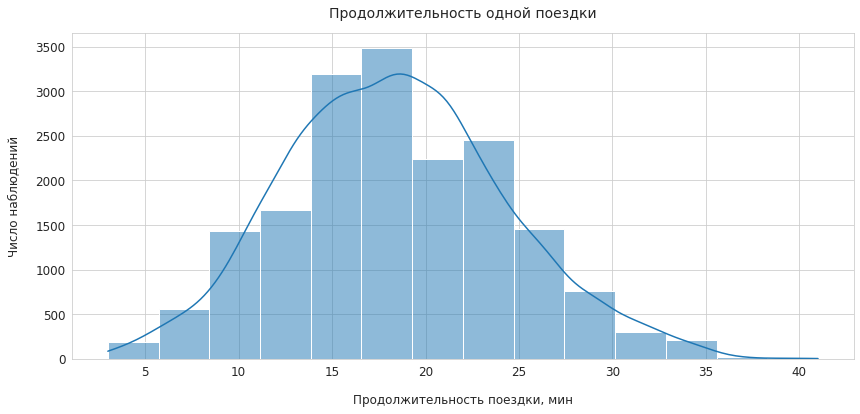

count    17973.000000
mean        18.394981
std          5.979419
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

In [20]:
# посмотрим на продолжительность поездок
bins = round(math.log2(len(rides) + 1))

fig, ax = plt.subplots(figsize=(14,6))
ax = sns.histplot(rides['duration'],bins=bins,kde=True)
ax.set_title('Продолжительность одной поездки', fontsize=14, pad=15)
ax.set_xlabel('Продолжительность поездки, мин', fontsize=12, labelpad=15)
ax.set_ylabel('Число наблюдений', fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, width=5)
plt.show()

display(rides['duration'].describe());

**Вывод**

В целом, график показывает нормальное распределение.

Продолжительность поездок отличается. 
**Наиболее часто пользователи совершают поездки длительностью в 14-20 минут.** Средняя и медианная продолжительность поездки составляет около 18 минут.
Самая быстрая поездка продолжалась всего 3 минуты, а самая длительная - 41 минуту. 

### Вывод Исследовательский анализ данных

По результатам исследовательского анализа данных видим, что сервис наиболее популярен у пользователей 22-27 лет. Чаще пользователи совершают поездки без подписки. При этом поездки обычно короткие около 3 км и продолжительностью около 18 минут. Наибольшей популярностью сервис пользуется в Пятигорске, при этом в Москве приложение имеет наименьшую популярность.


Более детализировано можно сделать следующие выводы:

*Города*
- Большая часть пользователей из Пятигорска. Меньше всего из Москвы.
- Чаще всего поездки совершают в Пятигорске, Екатеринбурге, Ростове и Краснодаре. Реже всего - поездки по Москве.

*Подписка*

-  Пользователей без подписки немного больше (54%), чем пользователей с подпиской (46%). Больше всего пользователей как с подпиской, так и без нее в Пятигорске. В целом по всем городам чаще совершают поездки пользователи без подписки. 

*Возраст*

- Средний возраст пользователей 25 лет. Пользователей в возрасте 22-27 лет около 51%. Среди пользователей 5% несовершеннолетних и 8% старше 32 лет.

*Расстояние*

- Среднее расстояние за одну поездку приблизительно 3130 метров. Однако количество поездок, меньше либо больше этого значения также довольно значительно.

*Продолжительность*

- Поездки в среднем продолжительностью около 18 минут. Чаще всего всего поездки совершаются в диапазоне от 14 до 20 минут.

## Объединение данных. Расстояние и время поездок по категориям

В рамках исследования необходимо было объединить данные о пользователях, поездках и подписках в один датафрейм (данное задание было выполнено на стадии Предоработки данных)

Теперь создадим 2 датафрейма:

- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

Затем визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [21]:
# убедимся, что объединенных датафрейм содержит корректные данные
print('\nИнформация об объединенном датасете\n')
get_general_info(data)


# сравним объем датасета с объемами датасетов, вошедших в него
print('\nИнформация о датасетах, вошедших в объединенный\n')
for df_after in [users, rides, subscriptions]:
    print(df_after.head())
    print('\n', '*'*50)
    print(f'Количество строк составляет: {len(df_after)}')
    print('*'*50, '\n')

print(f'\nКоличество строк объединенного датасета составляет {len(data)}.');


Информация об объединенном датасете


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   age_type           17973 non-null  object        
 6   distance           17973 non-null  int64         
 7   duration           17973 non-null  int64         
 8   date               17973 non-null  datetime64[ns]
 9   month              17973 non-null  int64         
 10  minute_price       17973 non-null  int64         
 11  start_ride_price   17973 non-null  int64         
 12  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), 

,user_id,name,age,city,subscription_type,age_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,22-27 лет,4410,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,22-27 лет,2618,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,22-27 лет,755,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,22-27 лет,2695,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,22-27 лет,4029,27,2021-08-28,8,6,0,199



 ************************************************** 

Количество пропусков во всем датасете составляет 0.
Таблица с пропусками в датасете:


,index,0
0,user_id,0
1,name,0
2,age,0
3,city,0
4,subscription_type,0
5,age_type,0
6,distance,0
7,duration,0
8,date,0
9,month,0



 ************************************************** 

Количество полностью совпадающих строк составляет 0.

 ************************************************** 

Общее количество строк составляет 17973.

 ************************************************** 


Информация о датасетах, вошедших в объединенный

   user_id        name  age            city subscription_type   age_type
0        1        Кира   22          Тюмень             ultra  22-27 лет
1        2   Станислав   31            Омск             ultra  28-31 лет
2        3     Алексей   20          Москва             ultra  18-21 лет
3        4  Константин   26  Ростов-На-Дону             ultra  22-27 лет
4        5       Адель   28            Омск             ultra  28-31 лет

 **************************************************
Количество строк составляет: 1534
************************************************** 

   user_id  distance  duration       date  month
0        1      4410        26 2021-01-01      1
1        1     

In [22]:
# создаем датафреймы по типу подписки

free = data.query('subscription_type == "free"')
ultra = data.query('subscription_type == "ultra"')


print('Информация о датасетах о пользователях по типу подписки')
get_general_info(free)

get_general_info(ultra)


print(f'\nКоличество строк датасета с пользователями с подпиской {len(ultra)}, '
f'\nКоличество строк датасета с пользователями без подписки {len(free)}, '
f'\nВ сумме в двух датасетах содержатся данные о {len(free) + len(ultra)} поездках, '
f'\nчто соответствует числу строк датасета, из которого они были созданы: {len(data)}.');

Информация о датасетах о пользователях по типу подписки

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11473 entries, 6500 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11473 non-null  int64         
 1   name               11473 non-null  object        
 2   age                11473 non-null  int64         
 3   city               11473 non-null  object        
 4   subscription_type  11473 non-null  object        
 5   age_type           11473 non-null  object        
 6   distance           11473 non-null  int64         
 7   duration           11473 non-null  int64         
 8   date               11473 non-null  datetime64[ns]
 9   month              11473 non-null  int64         
 10  minute_price       11473 non-null  int64         
 11  start_ride_price   11473 non-null  int64         
 12  subscription_fee   11473 non-null  int64         
dtypes

,user_id,name,age,city,subscription_type,age_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,22-27 лет,2516,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,22-27 лет,847,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,22-27 лет,4005,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,22-27 лет,1206,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,22-27 лет,3048,18,2021-02-14,2,8,50,0



 ************************************************** 

Количество пропусков во всем датасете составляет 0.
Таблица с пропусками в датасете:


,index,0
0,user_id,0
1,name,0
2,age,0
3,city,0
4,subscription_type,0
5,age_type,0
6,distance,0
7,duration,0
8,date,0
9,month,0



 ************************************************** 

Количество полностью совпадающих строк составляет 0.

 ************************************************** 

Общее количество строк составляет 11473.

 ************************************************** 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   age_type           6500 non-null   object        
 6   distance           6500 non-null   int64         
 7   duration           6500 non-null   int64         
 8   date               6500 non-null   datetime64[ns]
 9   month              6500

,user_id,name,age,city,subscription_type,age_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,22-27 лет,4410,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,22-27 лет,2618,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,22-27 лет,755,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,22-27 лет,2695,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,22-27 лет,4029,27,2021-08-28,8,6,0,199



 ************************************************** 

Количество пропусков во всем датасете составляет 0.
Таблица с пропусками в датасете:


,index,0
0,user_id,0
1,name,0
2,age,0
3,city,0
4,subscription_type,0
5,age_type,0
6,distance,0
7,duration,0
8,date,0
9,month,0



 ************************************************** 

Количество полностью совпадающих строк составляет 0.

 ************************************************** 

Общее количество строк составляет 6500.

 ************************************************** 


Количество строк датасета с пользователями с подпиской 6500, 
Количество строк датасета с пользователями без подписки 11473, 
В сумме в двух датасетах содержатся данные о 17973 поездках, 
что соответствует числу строк датасета, из которого они были созданы: 17973.


**Вывод**

**Объединение датасетов** прошло корректно. Объединенный датафрейм не содержит пропусков и дубликатов, включает в себя все столбцы первоначальных датасетов; данные отображаются корректно.
Число строк объединенного датасета совпадает с числом строк самого объемного датасета 'rides' с учетом удаленных аномальных поездок на стадии Предобработки данных.

**Создание датафреймов по типу подписки** прошло корректно. Объединенный датафрейм был разделен на 2 датасета: датасет с данными о пользователях с подпиской и датасет с данными о пользователях без подписки. В созданных датафреймах не появилось пропусков и дубликатов, число строк и столбцов подтверждает корректность их создания.

### Расстояние и время поездок для пользователей с подпиской и без

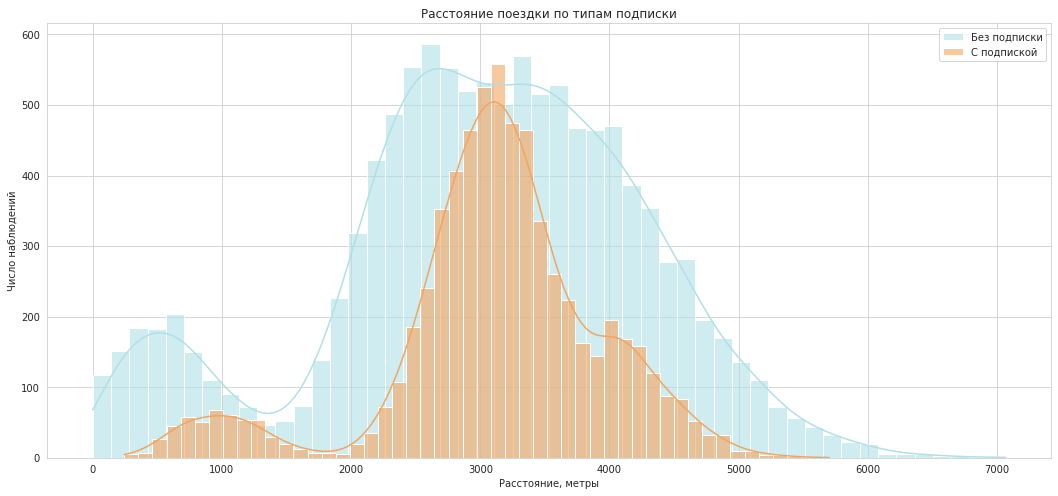

In [23]:
# визуализируем данные о расстоянии поездок пользователей с подпиской и без

plt.figure(figsize=(18, 8))
sns.histplot(free['distance'], alpha = 0.6, label = 'Без подписки', bins = 50, kde=True, color='powderblue')
sns.histplot(ultra['distance'], alpha = 0.6, label = 'С подпиской', bins = 50, kde=True, color='sandybrown')
plt.title('Расстояние поездки по типам подписки')
plt.xlabel('Расстояние, метры')
plt.ylabel('Число наблюдений')
plt.legend()
plt.show();

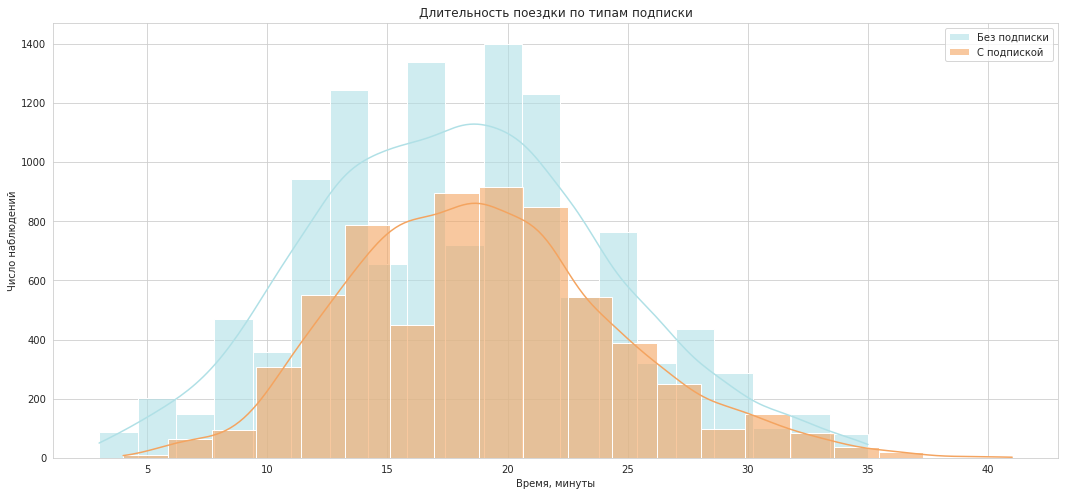

In [24]:
# визуализируем данные о длительности поездок пользователей с подпиской и без

plt.figure(figsize=(18, 8))
sns.histplot(free['duration'], alpha = 0.6, label = 'Без подписки', bins = 20, kde=True, color='powderblue')
sns.histplot(ultra['duration'], alpha = 0.6, label = 'С подпиской', bins = 20, kde=True, color='sandybrown')
plt.title('Длительность поездки по типам подписки')
plt.xlabel('Время, минуты')
plt.ylabel('Число наблюдений')
plt.legend() 
plt.show();


Статистические данные о расстоянии и времени пользователей с подпиской:


,distance,duration
count,6500.000000,6500.000000
mean,3115.949231,19.037692
std,836.894838,5.577439
min,245.000000,4.000000
25%,2786.000000,15.000000
50%,3149.000000,19.000000
75%,3561.000000,22.000000
max,5700.000000,41.000000



Статистические данные о расстоянии и времени пользователей без подписки:


,distance,duration
count,11473.000000,11473.000000
mean,3028.871612,18.030855
std,1235.541036,6.166175
min,1.000000,3.000000
25%,2361.000000,14.000000
50%,3103.000000,18.000000
75%,3884.000000,22.000000
max,7067.000000,35.000000


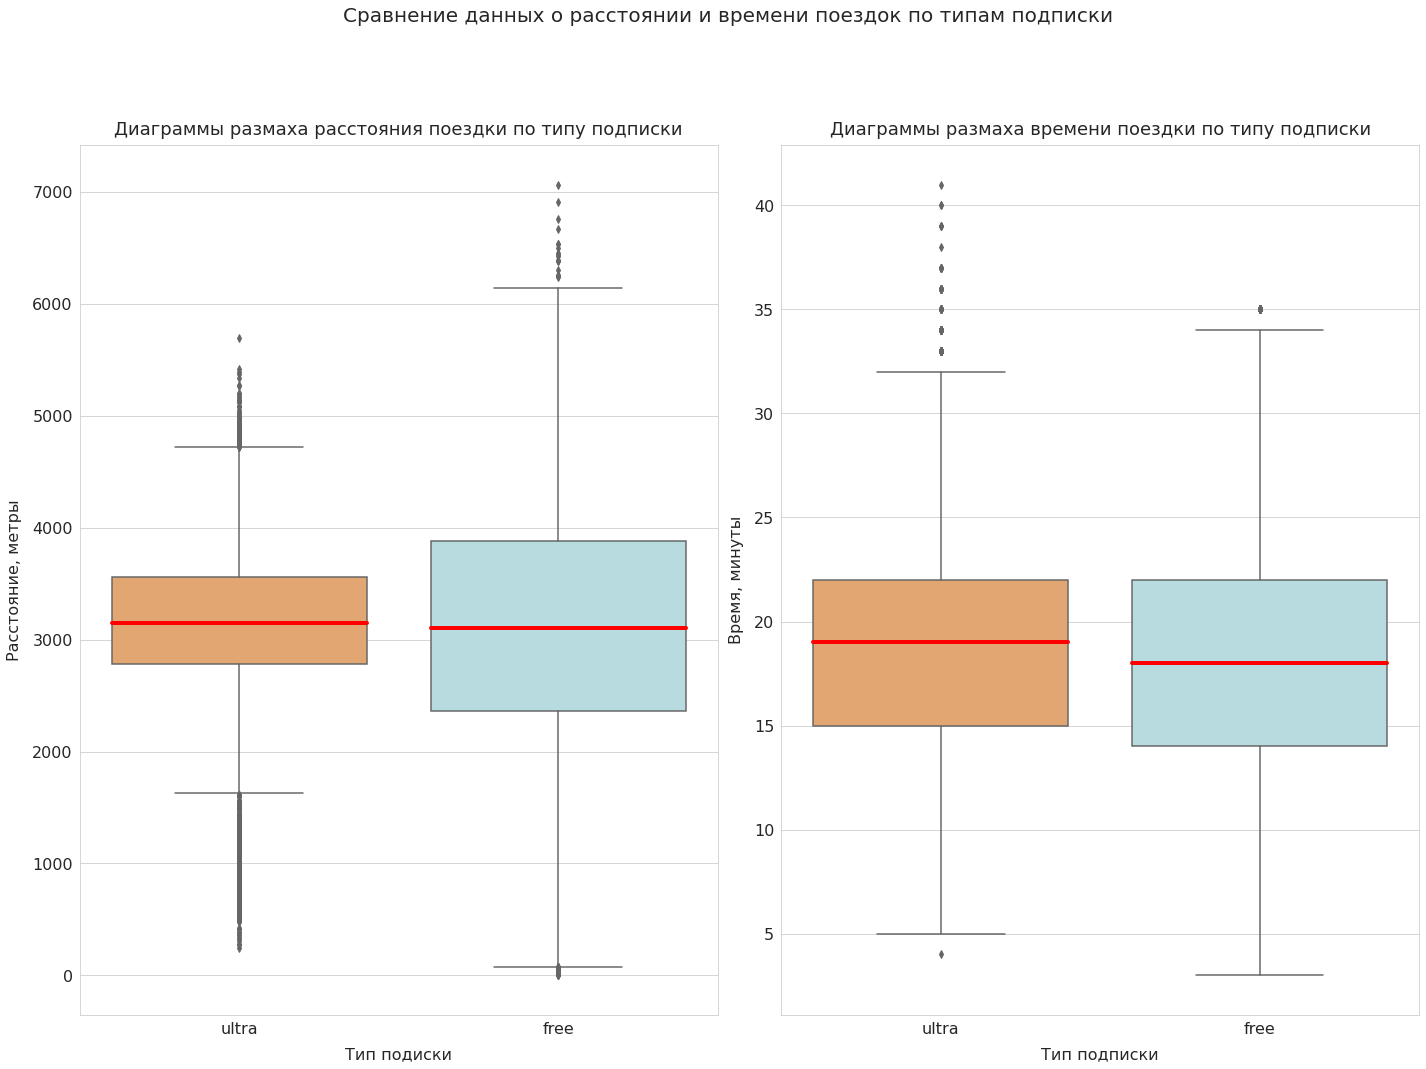

In [25]:
# посмотрим статистические данные о расстоянии и времени пользователей с подпиской
print('\nСтатистические данные о расстоянии и времени пользователей с подпиской:')
display(ultra[['distance', 'duration']].describe())

# посмотрим статистические данные о расстоянии и времени пользователей без подписки
print('\nСтатистические данные о расстоянии и времени пользователей без подписки:')
display(free[['distance', 'duration']].describe())


# построим диаграммы размаха значений о расстоянии и времени пользователей по категориям


fig, axes = plt.subplots(1, 2, figsize=(24,16))
fig.suptitle('Сравнение данных о расстоянии и времени поездок по типам подписки', fontsize=20, y=1)
plt.subplots_adjust(wspace = 0.1, 
                     hspace = 0.2)

sns.boxplot(ax=axes[0], data=data, x="subscription_type", y="distance", 
            medianprops={"color": "r", "linewidth": 4}, palette={'free':'powderblue', 'ultra':'sandybrown'})

axes[0].set_title('Диаграммы размаха расстояния поездки по типу подписки', fontsize=18, pad=10)
axes[0].set_xlabel('Тип подиски', fontsize=16, labelpad=10)
axes[0].set_ylabel('Расстояние, метры', fontsize=16, labelpad=10)
axes[0].tick_params(labelsize=16)




sns.boxplot(ax=axes[1], data=data, x="subscription_type", y="duration", 
            medianprops={"color": "r", "linewidth": 4}, palette={'free':'powderblue', 'ultra':'sandybrown'})

axes[1].set_title('Диаграммы размаха времени поездки по типу подписки', fontsize=18, pad=10)
axes[1].set_xlabel('Тип подписки', fontsize=16, labelpad=10)
axes[1].set_ylabel('Время, минуты', fontsize=16, labelpad=10)
axes[1].tick_params(labelsize=16);

**Вывод**

Как видим, в целом распределения похожи, что означает - пользователи независимо от подписки используют предоставляемые услуги схожим образом.

*Расстояние*

Среднее расстояние пользователей с подпиской 3029 метров, при том, что среднее расстояние пользователей без подписки немного меньше - 3029 метров.

Медианное значение у обоих групп немного выше, чем среднее расстояние. Вместе с тем, разница медианы и среднего менее 100 метров. Так, пользователи с подпиской медианно преодолевают 3149 метров, а без подписки - 3103 метра.

Максимальное значение и Минимальное значение Самое большое расстояние в 7067 метров проехал пользователь без подписки, среди пользователей с подпиской самое большое расстояние только 5700, т.е. на 2 км меньше.
Также видим, что показатели минимального расстояния меньше у пользователей без подписки - были поездки даже на 1 метр. При том, что пользователи с подпиской более осознанно оформляют сессию - минимальное расстояние в 245 метров.

*Время*
Среднее значение отличается на 1 минуту, у пользователей с подпиской среднее время на 1 минуту дольше - 19 минут, в то время как без подписки - 18 минут.
Медианное значение у обеих категорий совпадает со средним.
Максимальное значение и Минимальное значение Самая долгая поездка была у пользователя с подпиской - 41 минута. При том, что среди пользователей без подписки самая долгая поездка составила только 35 минут.

Из графиков видим, что пользователи без подиски чаще оформляют поездки, проезжая очень небольшое количество метров (менее 500 метров) либо напротив, проезжая более длинные дистанции (более 4500 метров). Аналогично видим и относительно длительности поездок: пользователи без подписки чаще совершают поездки короче 10 минут, и, в частности, короче 5 минут.

В целом, можем отметить тенденцию: пользователи  без подписки имеют более короткие по времени поездки по сравнению с пользователями с подпиской, но эпизодически проезжают более длинные расстояния, но за короткий промежуток времени.

## Выручка

Теперь создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Затем в этот датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

In [26]:
# создаем датафрейм с агрегированными данными о поездках и с помесячной выручкой на каждого пользователя
agg_data = data.pivot_table(index=['user_id', 'month'], 
                values=['distance', 'city', 'duration', 'start_ride_price', 'minute_price', 
                        'subscription_fee', 'subscription_type'], 
                aggfunc=({'distance':'sum', 'city':'count', 'duration':'sum', 
                          'start_ride_price':'first', 'minute_price':'first', 'subscription_fee':'first', 
                          'subscription_type':'first'}), 
                           fill_value=0).rename(columns={'city':'count_rides', 'distance':'total_distance', 
                                                         'duration':'total_duration'})

# добавим столбец с помесячной выручной для каждого пользователя
def get_revenue(row):
    if row['start_ride_price'] != 0:
        revenue = (row['start_ride_price']* row['count_rides']) + (row['minute_price'] \
                                          * row['total_duration']) + row['subscription_fee']
    else:
        revenue = row['minute_price'] * row['total_duration'] + row['subscription_fee']
    return revenue

agg_data['monthly_revenue'] = agg_data.apply(get_revenue, axis=1)

# посмотрим результат
print(f'\nОбщая выручка составила: {agg_data.monthly_revenue.sum()} рублей.\n')
agg_data.head(10)


Общая выручка составила: 3873131 рублей.



count_rides  total_distance  total_duration  minute_price  \
user_id month                                                              
1       1                2            7028              42             6   
        4                1             755               7             6   
        8                2            6724              46             6   
        10               2            5811              32             6   
        11               3            7005              56             6   
        12               2            6753              28             6   
2       3                3           10190              63             6   
        4                2            6165              40             6   
        6                1            3256              14             6   
        7                2            6781              48             6   

               start_ride_price  subscription_fee subscription_type  \
user_id month                                                         
1       1                     0               199             ultra   
        4                     0               199             ultra   
        8                     0               199             ultra   
        10                    0               199             ultra   
        11                    0               199             ultra   
        12                    0               199             ultra   
2       3                     0               199             ultra   
        4                     0               199             ultra   
        6                     0               199             ultra   
        7                     0               199             ultra   

               monthly_revenue  
user_id month                   
1       1                  451  
        4                  241  
        8                  475  
        10                 391  
        11                 535  
        12                 367  
2       3                  577  
        4                  439  
        6                  283  
        7                  487

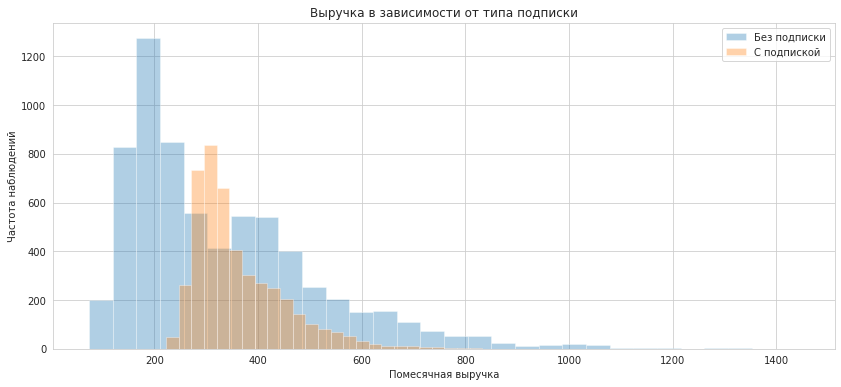

In [27]:
# гистограмма выручки по подпискам

plt.figure(figsize=(14, 6))
plt.hist(agg_data.query('subscription_type == "free"') ['monthly_revenue'], alpha = 0.35, label = 'Без подписки', bins = 30)
plt.hist(agg_data.query('subscription_type == "ultra"') ['monthly_revenue'], alpha = 0.35, label = 'С подпиской', bins = 30)
plt.title('Выручка в зависимости от типа подписки')
plt.xlabel('Помесячная выручка')
plt.ylabel('Частота наблюдений')
plt.legend()
plt.show()

**Вывод** 

Мы собрали агрегированные данные о поездках пользователей и посчитали суммарное расстроения, количество поездок и суммарное время поездки для каждого пользователя за каждый месяц. Затем мы добавили столбец с подсчетом помесячной выруяки, полученной от каждого пользователя.

Исходя из гистограммы помесячной выручки по типу подписки, можем предположить, что доход от пользователей с подпиской выше, несмотря на то, что выборка пользователей без подписки больше в количественном выражении.

## Проверка гипотез

Проверим некоторые гипотезы, которые помогут бизнесу определить направления для увеличения прибыли:

- Тратят ли пользователи с подпиской больше времени на поездки?
  
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
  
-  Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
  
-  Могло бы снизиться количество обращений в техподдержку после обновления сервиса?

### Тратят ли пользователи с подпиской больше времени на поездки?

Необходимо понять, тратят ли пользователи с подпиской больше времени на поездки. Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 
Для проверки гипотезы будем использовать исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [28]:
ultra_duration = data.query('subscription_type == "ultra"')['duration']
free_duration = data.query('subscription_type == "free"')['duration']
print(f'\nСредняя время сессии (время поездки) пользователей с подпиской: {round(np.mean(ultra_duration), 2)}')
print(f'\nСредняя время сессии (время поездки) пользователей без подписки: {round(np.mean(free_duration), 2)}')


print('\nНулевая гипотеза: Среднее время сессии (время поездки) пользователей с подпиской и без подписки одинаковое.',
     '\nАльтернативная гипотеза: Среднее время сессии (время поездки) у пользователей с подпиской больше, ', 
      'чем у пользователей без подписки.')

alpha = 0.05

hypotesis_1 = st.ttest_ind(ultra_duration, free_duration,  alternative='greater')

print(f'\np-value:{hypotesis_1.pvalue}')

if hypotesis_1.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНе отвергаем нулевую гипотезу')


Средняя время сессии (время поездки) пользователей с подпиской: 19.04

Средняя время сессии (время поездки) пользователей без подписки: 18.03

Нулевая гипотеза: Среднее время сессии (время поездки) пользователей с подпиской и без подписки одинаковое. 
Альтернативная гипотеза: Среднее время сессии (время поездки) у пользователей с подпиской больше,  чем у пользователей без подписки.

p-value:8.577910347796266e-28

Отвергаем нулевую гипотезу


**Вывод**

Отвергаем нулевую гипотезу о том, что пользователи с подпиской и без тратят одинаковое количество времени на поездки. Можем предполагать, что пользователи с подпиской тратят на одну поездку больше времени. В связи с чем, можно предположить, что такие пользователи могут принести больше прибыли и имеет смысл стимулировать пользователей приобретать (сохранять) подписку.

### Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу.

In [29]:
distance_ultra = data.query('subscription_type == "ultra"')['distance']
print(f'\nСреднее расстояние, которое проезжает пользователь за одну поездку: {round(np.mean(distance_ultra))}.')


print('\nНулевая гиптоеза: Среднее расстояние, которое проезжает пользователь с подпиской за одну поездку, ',
      '\nравно (не превышает) 3130 метров.\n',
     '\nАльтернативная гипотеза: Среднее расстояние, которое проезжает пользователь с подпиской ', 
      'за одну поездку больше 3130 метров.')

alpha = 0.05

value = 3130

hypotesis_2 = st.ttest_1samp(distance_ultra, value,  alternative='greater')

print(f'\np-value:{hypotesis_2.pvalue}')

if hypotesis_2.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНе отвергаем нулевую гипотезу')


Среднее расстояние, которое проезжает пользователь за одну поездку: 3116.

Нулевая гиптоеза: Среднее расстояние, которое проезжает пользователь с подпиской за одну поездку,  
равно (не превышает) 3130 метров.
 
Альтернативная гипотеза: Среднее расстояние, которое проезжает пользователь с подпиской  за одну поездку больше 3130 метров.

p-value:0.9120422337080507

Не отвергаем нулевую гипотезу


**Вывод**

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает оптимальных с точки зрения износа 3130 метров.

### Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Теперь проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [30]:
monthly_revenue_ultra = agg_data.query('subscription_type == "ultra"')['monthly_revenue']
monthly_revenue_free = agg_data.query('subscription_type == "free"')['monthly_revenue']
print(f'\nСредняя помесячная выручка от пользователей с подпиской: {round(np.mean(monthly_revenue_ultra))} рублей.')
print(f'\nСредняя помесячная выручка от пользователей без подписки: {round(np.mean(monthly_revenue_free))} рублей.')


print('\nНулевая гиптоеза: Средняя помесячная выручка от пользователей с подпиской', 
       '\nравна средней помесячной выручке от пользователей без подписки.\n',
     '\nАльтернативная гипотеза: Средняя помесячная выручка от пользователей с подпиской', 
       '\nвыше средней помесячной выручки от пользователей без подписки.')

alpha = 0.05

hypotesis_3 = st.ttest_ind(monthly_revenue_ultra, monthly_revenue_free,  alternative='greater')

print(f'\np-value:{hypotesis_3.pvalue}')

if hypotesis_3.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНе отвергаем нулевую гипотезу')


Средняя помесячная выручка от пользователей с подпиской: 363 рублей.

Средняя помесячная выручка от пользователей без подписки: 329 рублей.

Нулевая гиптоеза: Средняя помесячная выручка от пользователей с подпиской 
равна средней помесячной выручке от пользователей без подписки.
 
Альтернативная гипотеза: Средняя помесячная выручка от пользователей с подпиской 
выше средней помесячной выручки от пользователей без подписки.

p-value:2.0314113674863288e-30

Отвергаем нулевую гипотезу


**Вывод** 

По результатам проверки гипотезы можем предположить, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Соответственно, стоит удерживать пользователей с подпиской и искать стратегию по привлечению пользователей покупать подписку.

### Могло бы снизиться количество обращений в техподдержку после обновления сервиса?

Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобится для проверки этой гипотезы?

Для проверки такой гипотезы понадобится двухвыборочный t-тест для зависимых выборок. Так как фактически мы будем анализировать одну генеральную совокупность, с которой произошли изменения.

**Выборки**:
1) Данные из файла о количестве обращений пользователей до обновления серверов.
2) Данные из файла о количестве обращений  пользователей после обновления серверов.

**Нулевая гипотеза**: Среднее количество обращений пользователей до и после обновления совпадает.

**Альтернативная гипотеза**: Среднее количество обращений пользователей после обновления меньше, чем среднее количество обращений до обновления.


Рассмотрим пример.

In [31]:
# набор данных об обращении в техподдержку до обновления
before_update = [18, 1, 20, 25, 5, 16]

# набор данных об обращении в техподдержку после обновления
after_update = [12, 0, 15, 20, 2, 14]

print(f'\nСреднее количество обращений до обновления: {round(np.mean(before_update))}.')
print(f'\nСреднее количество обращений после обновления: {round(np.mean(after_update))}.')

# проверяем гипотезу

alpha = 0.01

results = st.ttest_rel(after_update, before_update, alternative='less')

print(f'\np-value:{results.pvalue}')

if results.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНе отвергаем нулевую гипотезу')


Среднее количество обращений до обновления: 14.

Среднее количество обращений после обновления: 10.

p-value:0.0030077954677934647

Отвергаем нулевую гипотезу


### Вывод Проверка гипотез

По результатам проверки гипотез можем сделать следующие выводы:

Пользователи с подпиской зачастую тратят больше времени на поездки, чем пользователи без подписки. Более того, пользователи с подпиской действительно приносят больше дохода каждый месяц, чем пользователи без подписки.

Следовательно сервис заинтересован в удержании пользователей именно с подпиской и в оформлении подписки новыми пользователями. Указанное позволит увеличить выручку.

Также относительно износа самокатов проверили, что подписчики не превышают расстояние в 3130 метров за одну поездку.

## Распределения

### Акция с раздачей промокодов

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. 


Необходимо определить минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.

Из имеющихся данных видим:

Количество попыток - фиксировано и конечно (100).
Каждая попытка - простой эксперимент Бернули с 2 исходами: пользователь либо продлит подписку, либо нет.
Вероятность успеха одинакова для всех попыток (10%) и попытки независимы друг от друга.

При количестве промокодов в 1000, математическое ожидание 100.0, а вероятность получить меньше равна 0.5


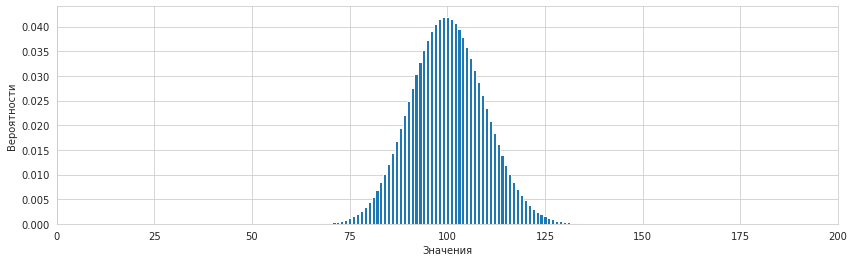

In [32]:
# задаём параметры биномиального распределения
n = 1000
p = 0.1
p_2 = 0.05

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = math.sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 
result = distr.cdf(100)
print(f'При количестве промокодов в {n}, математическое ожидание {mu}, а вероятность получить меньше равна {result}')


# построим график биномиального распределения

n = 1000 # количество попыток
p = 0.1 # вероятность успеха

distr = []

# ищем вероятности успеха для всех попыток от нуля до n
for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)

# строим график распределения
plt.figure(figsize=(14, 4))
plt.bar(range(0, n + 1), distr)
plt.xlabel('Значения')
plt.ylabel('Вероятности')
plt.xlim(0, 200);

In [33]:
# ищем, при каком минимальном размере биномиального распределения (при каком количестве рассылок)
# у нас левый хвост нормального распределения будет равен 0.05. Возьмем в качестве старта 1000 промокодов

while binom.cdf(99, n, p) > p_2:
    n = n + 1
    
print(f'\nНайдено минимальное количество промокодов: {n}.\n'
      f'\nПри таком количестве промокодов вероятность НЕвыполнения плана '
      f'по продлению подписки 100 пользователями будет {round(((binom.cdf(99, n, p))*100),2)}%.')


Найдено минимальное количество промокодов: 1161.

При таком количестве промокодов вероятность НЕвыполнения плана по продлению подписки 100 пользователями будет 4.98%.


### Push-уведомления

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений.

Необходимо оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.


Вероятность того, что уведомление откроют не более 399,5 пользователей составляет около 15.4%



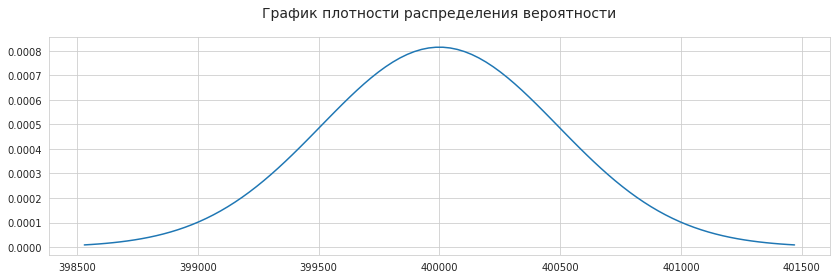

In [34]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4


# задаём параметры норм. распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = math.sqrt(n * p * (1 - p))

# значение, для которого хотим найти вероятность
x = 399500

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста
result = distr.cdf(x)

print(f'\nВероятность того, что уведомление откроют не более 399,5 пользователей '
      f'составляет около {round((result), 3)*100}%\n')


# построим график плотности распределения вероятности
plt.figure(figsize=(14, 4))
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, distr.pdf(x))
plt.title('График плотности распределения вероятности', fontsize=14, pad=20)
plt.show();

## Общие выводы

Проведено исследование данных о пользователях сервиса аренды самокатов GoFast за период с 01.01.2021 по 30.12.2021. 

**Результаты исследования и анализа**

Основные пользователи сервиса и целевая аудитория приложения - молодые люди в возрасте 22-27 лет. Чаще всего поездки совершают пользователи из Пятигорска и меньше всего из Москвы. Пользователей без подписки больше (54%), чем пользователей с подпиской (46%). Средняя продолжительность поездки - 18 минут, а среднее расстояние - 3130 метров. 
При этом, средняя продолжительность поездки пользователей с подпиской выше. Также больше и средняя помесячная выручка от пользователей с подпиской. 

**Общие рекомендации**

- Необходимо увеличивать число пользователей с подпиской и удерживать тех, кто уже подписку приобрел. Такие пользователи совершают более длительные поездки и приносят больше выручки.
- Необходимо выяснить, почему приложение не пользуется популярностью среди жителей Москвы, так как это потеря огромной потенциальной аудитории.
- Стоит обратить внимание на несовершеннолетнюю категорию пользователей с точки зрения соблюдения действующего законодательства.
- Следует проверить работу программы по подсчету продолжительности и расстояния поездки. Выявленые аномалия свидетельствуют о том, что программа совершает ошибки в подсчетах.

___
**Результаты работы с проектом**


**Общий анализ данных. Предобработка**

Исследуемые данные представляли собой три файла формата csv о некоторых пользователях сервиса из нескольких городов, об их поездках, а также о тарифах, предлагаемых сервисом для своих пользователей. 

Существенных искажений в данных не было обнаружено. Датасеты не содержали пропуски, было выявлено незначительное число дубликатов и аномалий, которые были удалены. Такое качество исходных данных повышает релевантность и точность исследования.

Аномалии представляли собой максимально короткие по длительности и очень длинные по расстоянию поездки. Указанное может свидетельствовать о том, что система подсчета времени/расстояния требует доработки.

В столбцах установлен корректный тип данных. Был изменен тип данных только в столбце 'date' на 'datetime'. Столбцы с дистанцией и продолжительностью поездки были округлены до бОльшего целого значения.

В датасеты добавлены новые столбцы:

- месяц поездки,
- возрастная категория пользователя.

По результатам предобработки данных общий объем датасета уменьшился менее чем на 3%.
Данные трех датасетов были объединены для удобства в дальнейшем исследовании.

**Исследование данных**

Данные представлены о поездках пользователей из 8 городов. Явного лидера по частоте встречаемости городов нет, у всех городов частота в пределах 11-14%%. Больше всего пользователей из Пятигорска (14%).Чаще остальных поездки совершают пользователи также из Пятигорска (около 14%). Вместе с тем, меньше всего данных о поездках в Москве (только 10%). Такие результаты о пользователях из Москвы требуют обсуждения, так как для мегаполиса такие данные могут свидетельствовать о недоступности приложения для пользователей по каким-то причинам или несоответствию предложения запросам пользователей из этого города либо о недостатке рекламы в этом городе.

Пользователей без подписки немного больше - 54%, чем пользователей с подпиской - только 46%.


Анализ возраста показал, что приложением пользуются пользователи от 12 до 43 лет. Стоит обратить внимание, что группа несовершеннолетних пользователей представлена 5% от всех, а старше 32 лет - 8% пользователей. Большинство пользователей (51%) - молодые люди в возрасте 22-27 лет. Представляется, что следует обратить внимание на регулирование правоотношений при использовании приложения несовершеннолетними. Для развития бизнеса стоит более детально рассмотреть характеристики поездок пользователей возраста 22-27 лет, чтобы выявить их предпочтения.

Среднее расстояние поездки составляет 3130 метров, что соответствует оптимальному расстоянию с точки зрения износа самоката. Встречаются совсем короткие поездки (менее 0,5 км) и достаточно длинные (около 6-7 км) - такие поездки представляются реалистичными. Возможно, стоит обратить внимание и отдельно рассмотреть дальнейшее поведение пользователей, соверших короткие поездки: напр., продолжают ли они пользоватся сервисом либо удаляют приложение, какие поездки совершают.

Анализ данных о продолжительности одной поездки показал, что средняя продолжительность одной поездки около 18 минут. В основном пользователи совершают поездки за 14-25 минут. Иногда поездки очень непродолжительные - менее 5 минут либо напротив, около 40 минут. Вместе с тем, такие поездки редкие.

**Объединение данных**
 
Объединение данных трех датасетов было произведено еще на стадии Предобработки данных. Были созданы 2 датафрейма: с данными о пользователях без подписки и с данными о пользователях с подпиской.

Пользователи независимо от подписки используют предоставляемые услуги схожим образом. Видим, что пользователи без подиски чаще оформляют поездки, проезжая очень небольшое количество метров (менее 500) и чаще совершают поездки короче 10 минут, и даже короче 5 минут.


**Подсчет выручки**

На данном этапе был создан расширенный датафрейм о поездках на основе датафрейма с объединёнными данными. Было найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также была рассчитана помесячная выручка от каждого пользователя. Общая выручка по предоставленным данным составила: 3 873 131 рублей.

**Проверка гипотез**

Были проверены гипотезы, выдвинутые менеджерами продукта сервиса.

По результатам проверки гипотезы было выявлено, что все гипотезы менеджеров оказались верными:

Пользователи с подпиской действительно тратят на одну поездку больше времени. В связи с чем, можно предположить, что такие пользователи могут принести больше прибыли и имеет смысл искать стратегию для стимулирования пользователей приобретать подписку.

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимальных с точки зрения износа самоката 3130 метров.

Пользователи с подпиской действительно приносят больше дохода каждый месяц, чем пользователи без подписки. Соответственно, стоит удерживать пользователей с подпиской и искать стратегию для привлечения новых пользователей покупать подписку.

**Распределения**

В результате дополнительного анализа данных было выявлено:

- Для 5% вероятности получить менее 100 клиентов необходимо предлжоить 1169 пользователю бесплатную подписку;
- Вероятность того, что push-уведомление откроет менее 399,5 тыс. пользователей из 1 млн составляет 15,4%.